In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [12]:
data = pd.read_csv('/content/amazonFood.csv')

In [13]:
data.shape

(41710, 6)

In [14]:
data.head()

,ProductId,UserId,productName,Score,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...


In [32]:
data['Id'] = data.index

In [33]:
data.head()

,ProductId,UserId,productName,Score,Summary,Text,Id
0,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...,4


In [15]:
score_counts = pd.DataFrame(data['Score'].value_counts().sort_index())
score_counts

,Score
1,3883
2,2328
3,3316
4,6000
5,26183


Text(0.5, 0, 'Score')

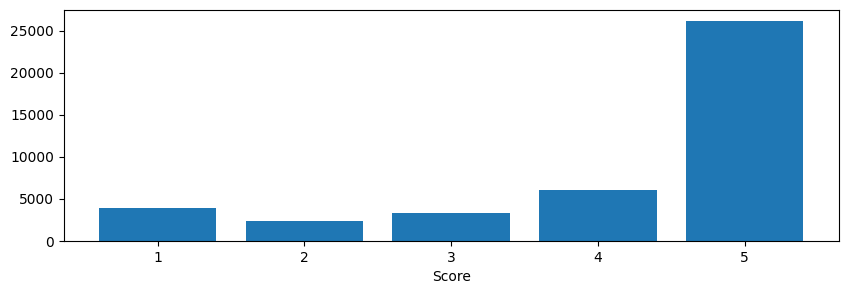

In [16]:
fig,ax = plt.subplots(figsize=(10,3))
plt.bar(x=score_counts.index,height=score_counts['Score'])
ax.set_xlabel('Score')

In [17]:
example = data['Text'][100]
example

"I love asparagus.  Up until very recently, I had never had pickled asparagus.  Oh my goodness, when a friend introduced me to this exact brand, I couldn't believe how great stuff tasted.  I loved it so much I bought the six pack.  I've got 2 jars left.  Gonna need more!!"

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [19]:
tokens = nltk.word_tokenize(example)
tokens[:5]

['I', 'love', 'asparagus', '.', 'Up']

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
tags= nltk.pos_tag(tokens)

tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('asparagus', 'RB'),
 ('.', '.'),
 ('Up', 'RP'),
 ('until', 'IN'),
 ('very', 'RB'),
 ('recently', 'RB'),
 (',', ','),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('never', 'RB'),
 ('had', 'VBN'),
 ('pickled', 'VBN'),
 ('asparagus', 'RB'),
 ('.', '.'),
 ('Oh', 'UH'),
 ('my', 'PRP$'),
 ('goodness', 'NN'),
 (',', ','),
 ('when', 'WRB'),
 ('a', 'DT'),
 ('friend', 'NN'),
 ('introduced', 'VBD'),
 ('me', 'PRP'),
 ('to', 'TO'),
 ('this', 'DT'),
 ('exact', 'JJ'),
 ('brand', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('could', 'MD'),
 ("n't", 'RB'),
 ('believe', 'VB'),
 ('how', 'WRB'),
 ('great', 'JJ'),
 ('stuff', 'NN'),
 ('tasted', 'VBD'),
 ('.', '.'),
 ('I', 'PRP'),
 ('loved', 'VBD'),
 ('it', 'PRP'),
 ('so', 'RB'),
 ('much', 'JJ'),
 ('I', 'PRP'),
 ('bought', 'VBD'),
 ('the', 'DT'),
 ('six', 'CD'),
 ('pack', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('got', 'VBD'),
 ('2', 'CD'),
 ('jars', 'NNS'),
 ('left', 'VBD'),
 ('.', '.'),
 ('Gon', 'NNP'),
 ('na', 'TO'),
 ('need',

In [22]:
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [23]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [24]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  I/PRP
  love/VBP
  asparagus/RB
  ./.
  Up/RP
  until/IN
  very/RB
  recently/RB
  ,/,
  I/PRP
  had/VBD
  never/RB
  had/VBN
  pickled/VBN
  asparagus/RB
  ./.
  Oh/UH
  my/PRP$
  goodness/NN
  ,/,
  when/WRB
  a/DT
  friend/NN
  introduced/VBD
  me/PRP
  to/TO
  this/DT
  exact/JJ
  brand/NN
  ,/,
  I/PRP
  could/MD
  n't/RB
  believe/VB
  how/WRB
  great/JJ
  stuff/NN
  tasted/VBD
  ./.
  I/PRP
  loved/VBD
  it/PRP
  so/RB
  much/JJ
  I/PRP
  bought/VBD
  the/DT
  six/CD
  pack/NN
  ./.
  I/PRP
  've/VBP
  got/VBD
  2/CD
  jars/NNS
  left/VBD
  ./.
  (PERSON Gon/NNP)
  na/TO
  need/VB
  more/JJR
  !/.
  !/.)


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores(example)

{'neg': 0.059, 'neu': 0.676, 'pos': 0.265, 'compound': 0.9116}

In [29]:
from tqdm.notebook import tqdm

In [34]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/41710 [00:00<?, ?it/s]

In [37]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(data, how='left')

In [38]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,productName,Score,Summary,Text
0,0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,Dogswell Vitality Canned Dog Food Case Duck,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,Southern Grove Premium Quality Roasted and Sal...,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,Turkish Delight Filbert (Hazelnuts) (Sultan) 1...,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,"Faeries Finest Flavor Extract, Cherry, 2.04 Ounce",2,Cough Medicine,If you are looking for the secret ingredient i...
4,4,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Salt Water Taffy - Assorted, 5 lbs",5,Great taffy,Great taffy at a great price. There was a wid...


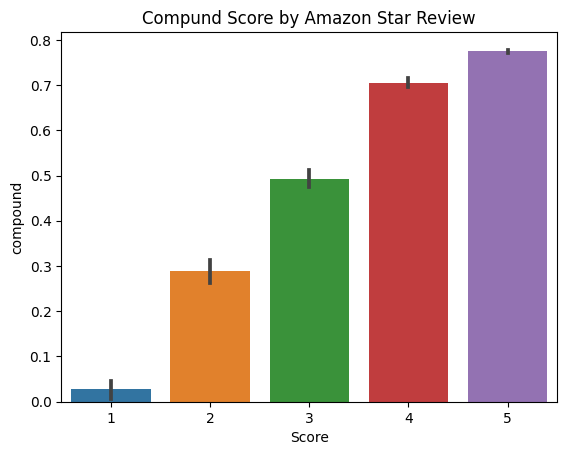

In [39]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

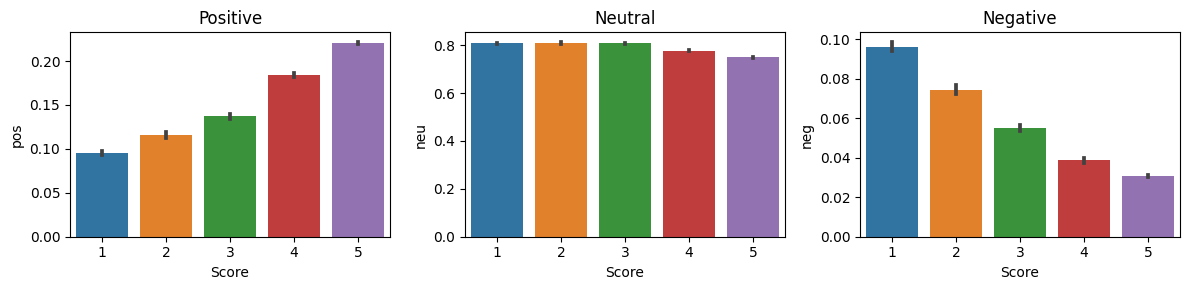

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()